************ WEATHER PREDICTION ************

In [63]:
## import required library and module##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

DATA PROCESSING

In [51]:
# load data
data = pd.read_csv('/Users/akashbarpanda/Documents/summer/internship/.venv/weather prediction/seattle-weather.csv')
data.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [52]:
# check missing value
print(data.isna().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [53]:
#convert date to useful numberic format
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# convert weather column to numberic value (encoding)
level = LabelEncoder()
data['Encoded weather'] = level.fit_transform(data['weather'])
data.head(5)


,date,precipitation,temp_max,temp_min,wind,weather,month,day,Encoded weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5,2


[]

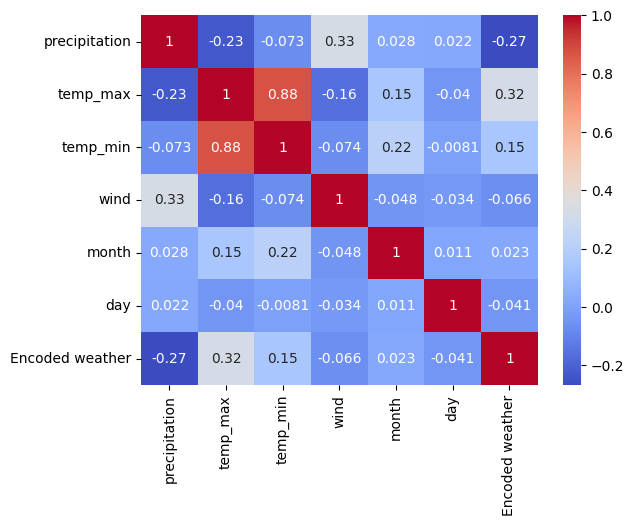

In [54]:
# check feature selection
selected_column = ['precipitation','temp_max','temp_min','wind','month','day','Encoded weather']
sns.heatmap(data[selected_column].corr(),annot= True,cmap='coolwarm')
plt.plot()

In [55]:
#target level
Y = data['Encoded weather']

# feature selection
X = data[['precipitation','temp_max','temp_min','wind','month','day']]

In [56]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 1,test_size=0.2,stratify=Y)



MODEL DEVELOPMENT

In [60]:
# model used is random forest classifier because if performs better in multi class classification 
model = RandomForestClassifier(n_estimators=100,random_state=67)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=67)

In [66]:
predicted = model.predict(x_test)

Evaluation

Accuracy: 85.32%
Precision score: 77.19%
Recall score: 54.64%
F1 score: 56.21%


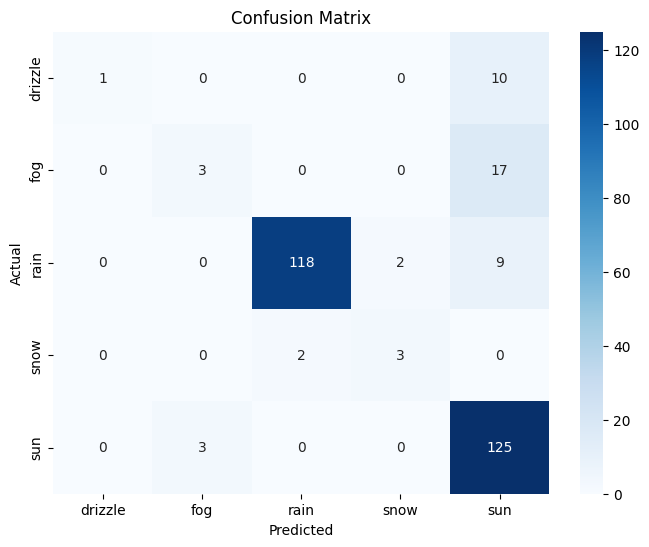

In [78]:
# metrics
print(f"Accuracy: {accuracy_score(y_test,predicted)*100:.2f}%")
print(f"Precision score: {precision_score(y_test,predicted,average='macro')*100:.2f}%")
print(f"Recall score: {recall_score(y_test,predicted,average='macro')*100:.2f}%")
print(f"F1 score: {f1_score(y_test,predicted,average='macro')*100:.2f}%")

#confusion matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=level.classes_, yticklabels=level.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


